In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.nunique() # Number of unique values in categorical columns

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
print("Survived   : ", titanic.Survived.unique())
print("PClass.    : ", titanic.Pclass.unique())
print("Sex        : ", titanic.Sex.unique())
print("Embarked   : ", titanic.Embarked.dropna().unique())

Survived   :  [0 1]
PClass.    :  [3 1 2]
Sex        :  ['male' 'female']
Embarked   :  ['S' 'C' 'Q']


#### Check for the duplicated if present drop them

In [9]:
titanic.duplicated().sum()

np.int64(0)

In [10]:
titanic.drop_duplicates(inplace = True)

#### Dealing with missing values

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

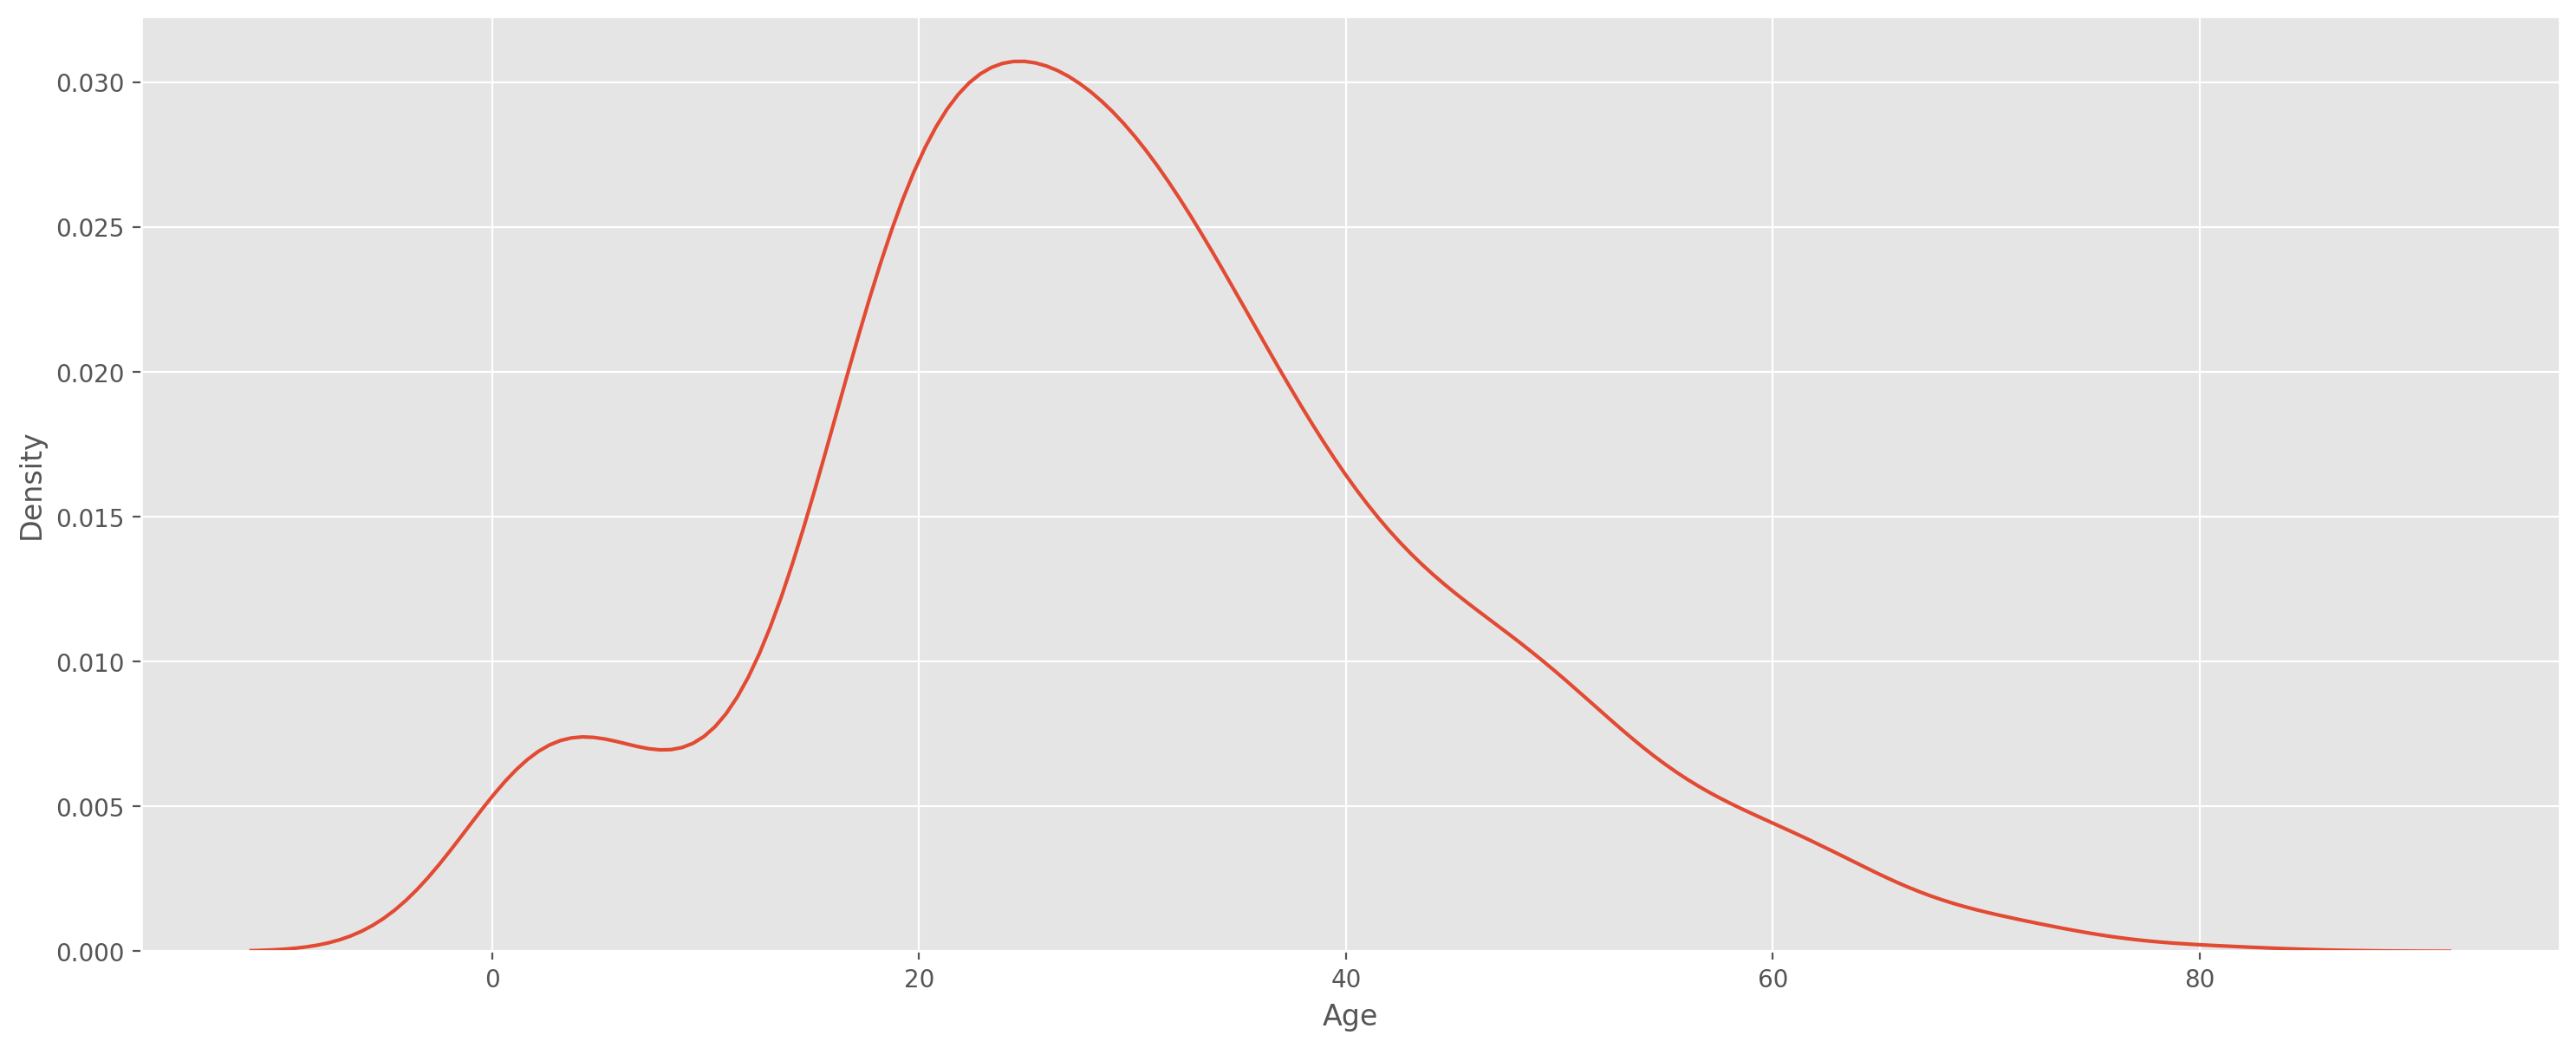

In [19]:
plt.figure(figsize = (18,7), dpi = 200)
sns.distplot(titanic.Age, hist = False)
plt.show()

In [20]:
titanic.Age.replace(np.nan, titanic.Age.mean(), inplace = True)

In [21]:
titanic.Embarked.replace(np.nan, titanic.Embarked.mode()[0], inplace = True)

titanic.isnull().sum()

In [23]:
titanic['fam_mem'] = titanic.SibSp + titanic.Parch
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fam_mem
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### Exploratory data analysis
- ##### There are two way we can do the EDA: 
   1. Univariate analysis : To understand the single feature
   2. Bivariate analysis. : To understand the relationship between two features.

In [25]:
# How many survived and how many died - Univariate analysis
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
survival_ratio = titanic.Survived.value_counts(normalize = True)
print('Percentage of Survivors : ', round(survival_ratio[1]*100, 2),'%')
print('Percentage of Dead      : ', round(survival_ratio[0]*100, 2),'%')

Percentage of Survivors :  38.38 %
Percentage of Dead      :  61.62 %


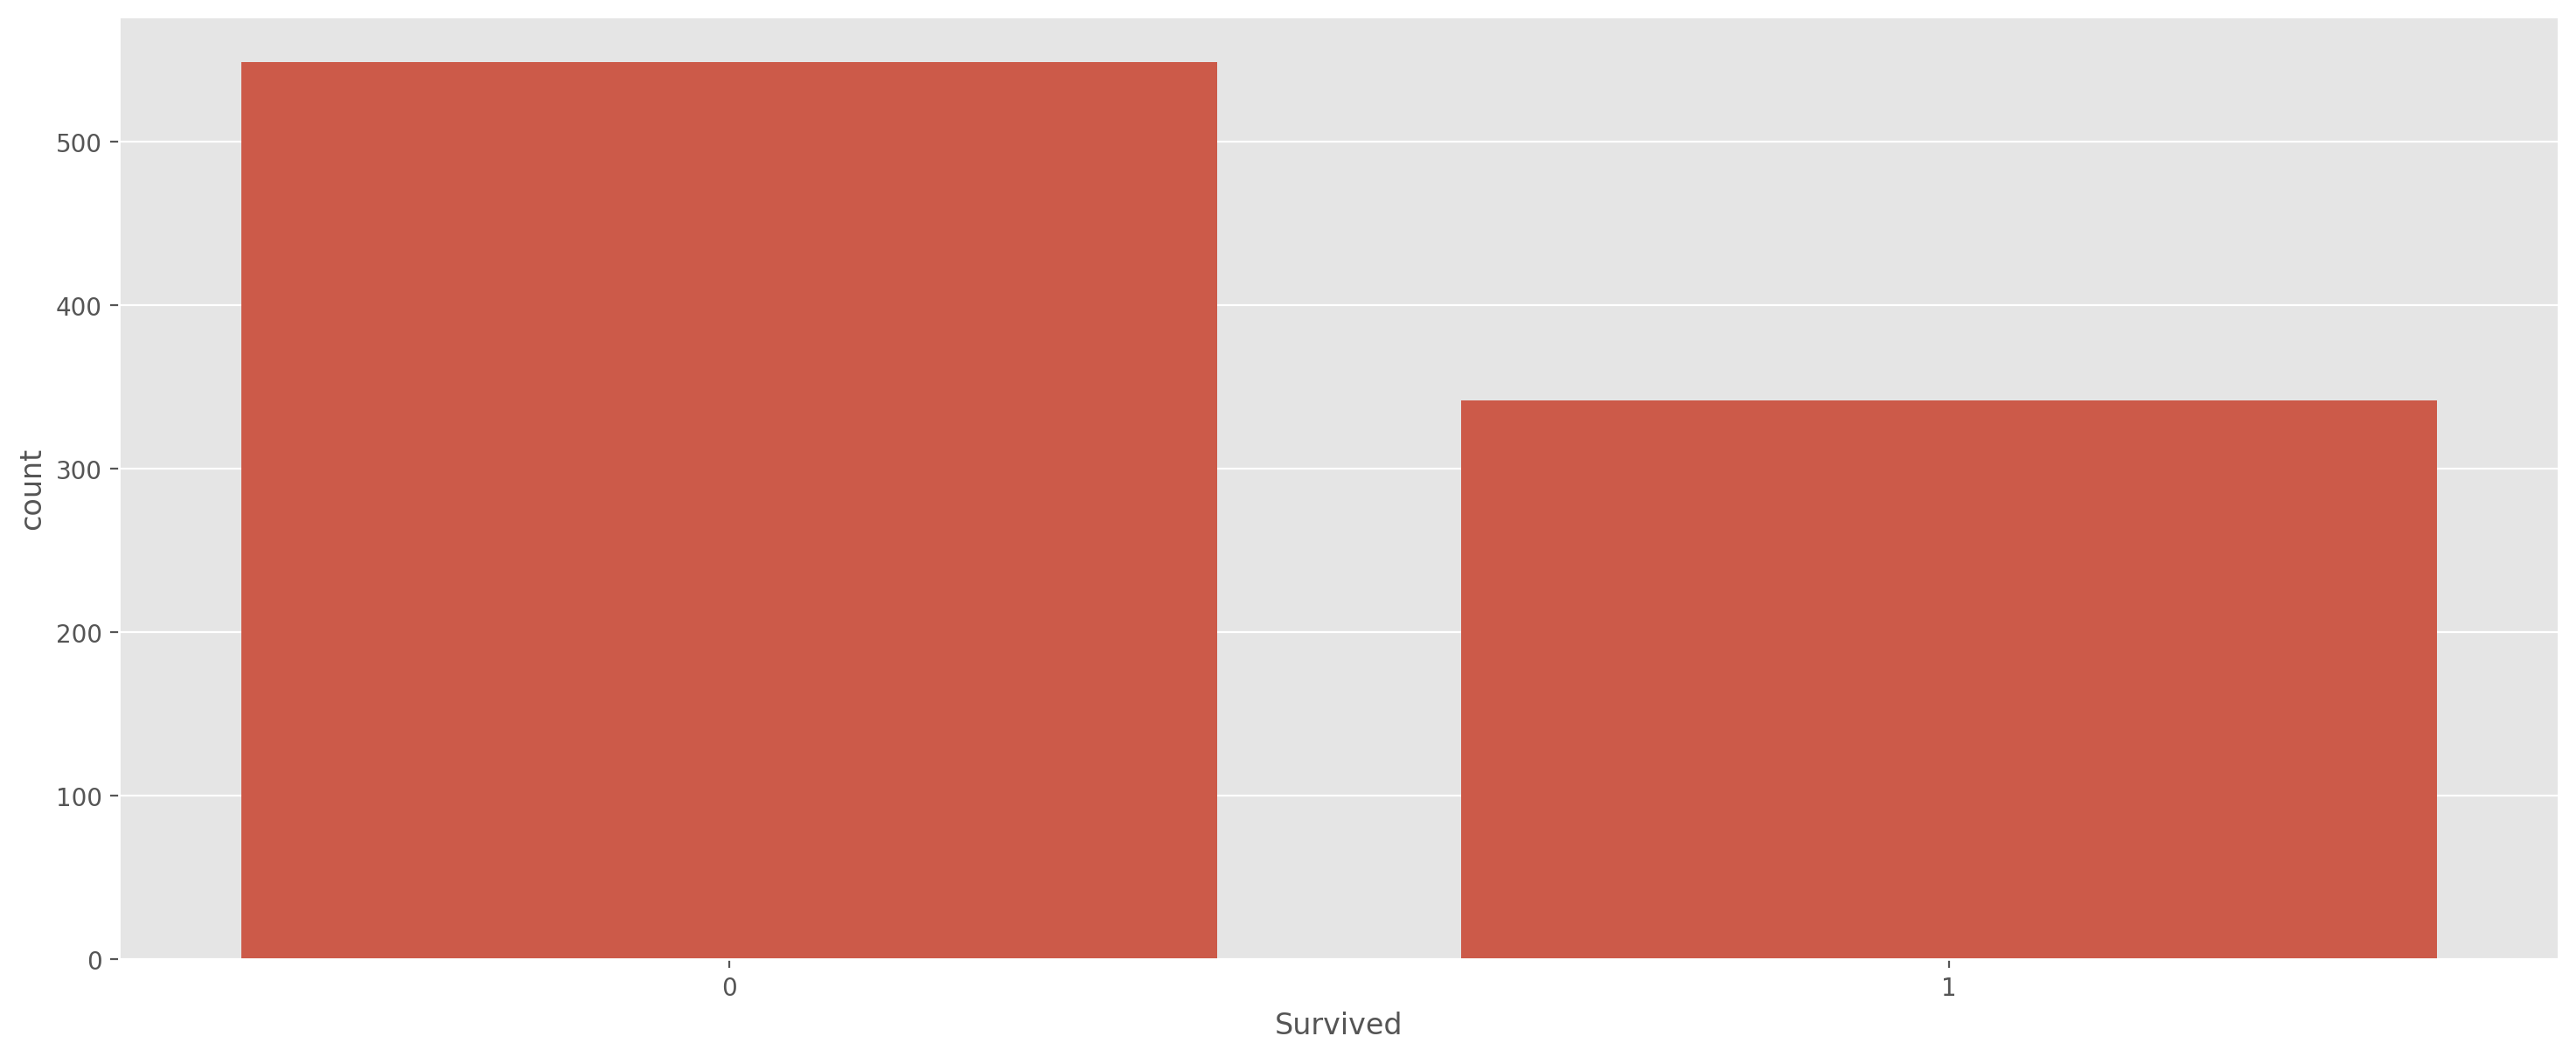

In [30]:
plt.figure(figsize = (18,7), dpi = 200)
sns.countplot(x = titanic.Survived)
plt.show()

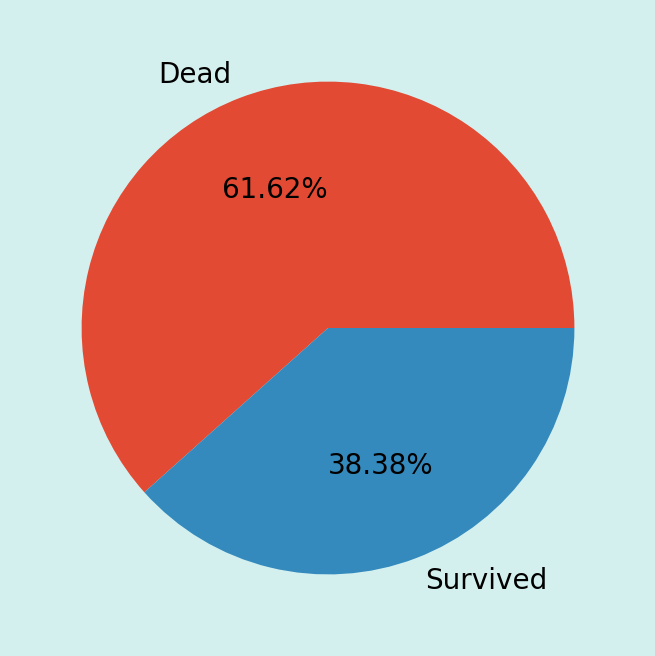

In [31]:
survival_data = titanic.Survived.value_counts().values
labels = ['Dead', 'Survived']

plt.figure(figsize = (18,4), dpi = 200, facecolor = '#d3f0ef')
plt.pie(survival_data, labels = labels, autopct = '%1.2f%%')

plt.show()

In [32]:
# Survival and passenger class
titanic.groupby('Pclass').Survived.value_counts(normalize = True).sort_index()

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

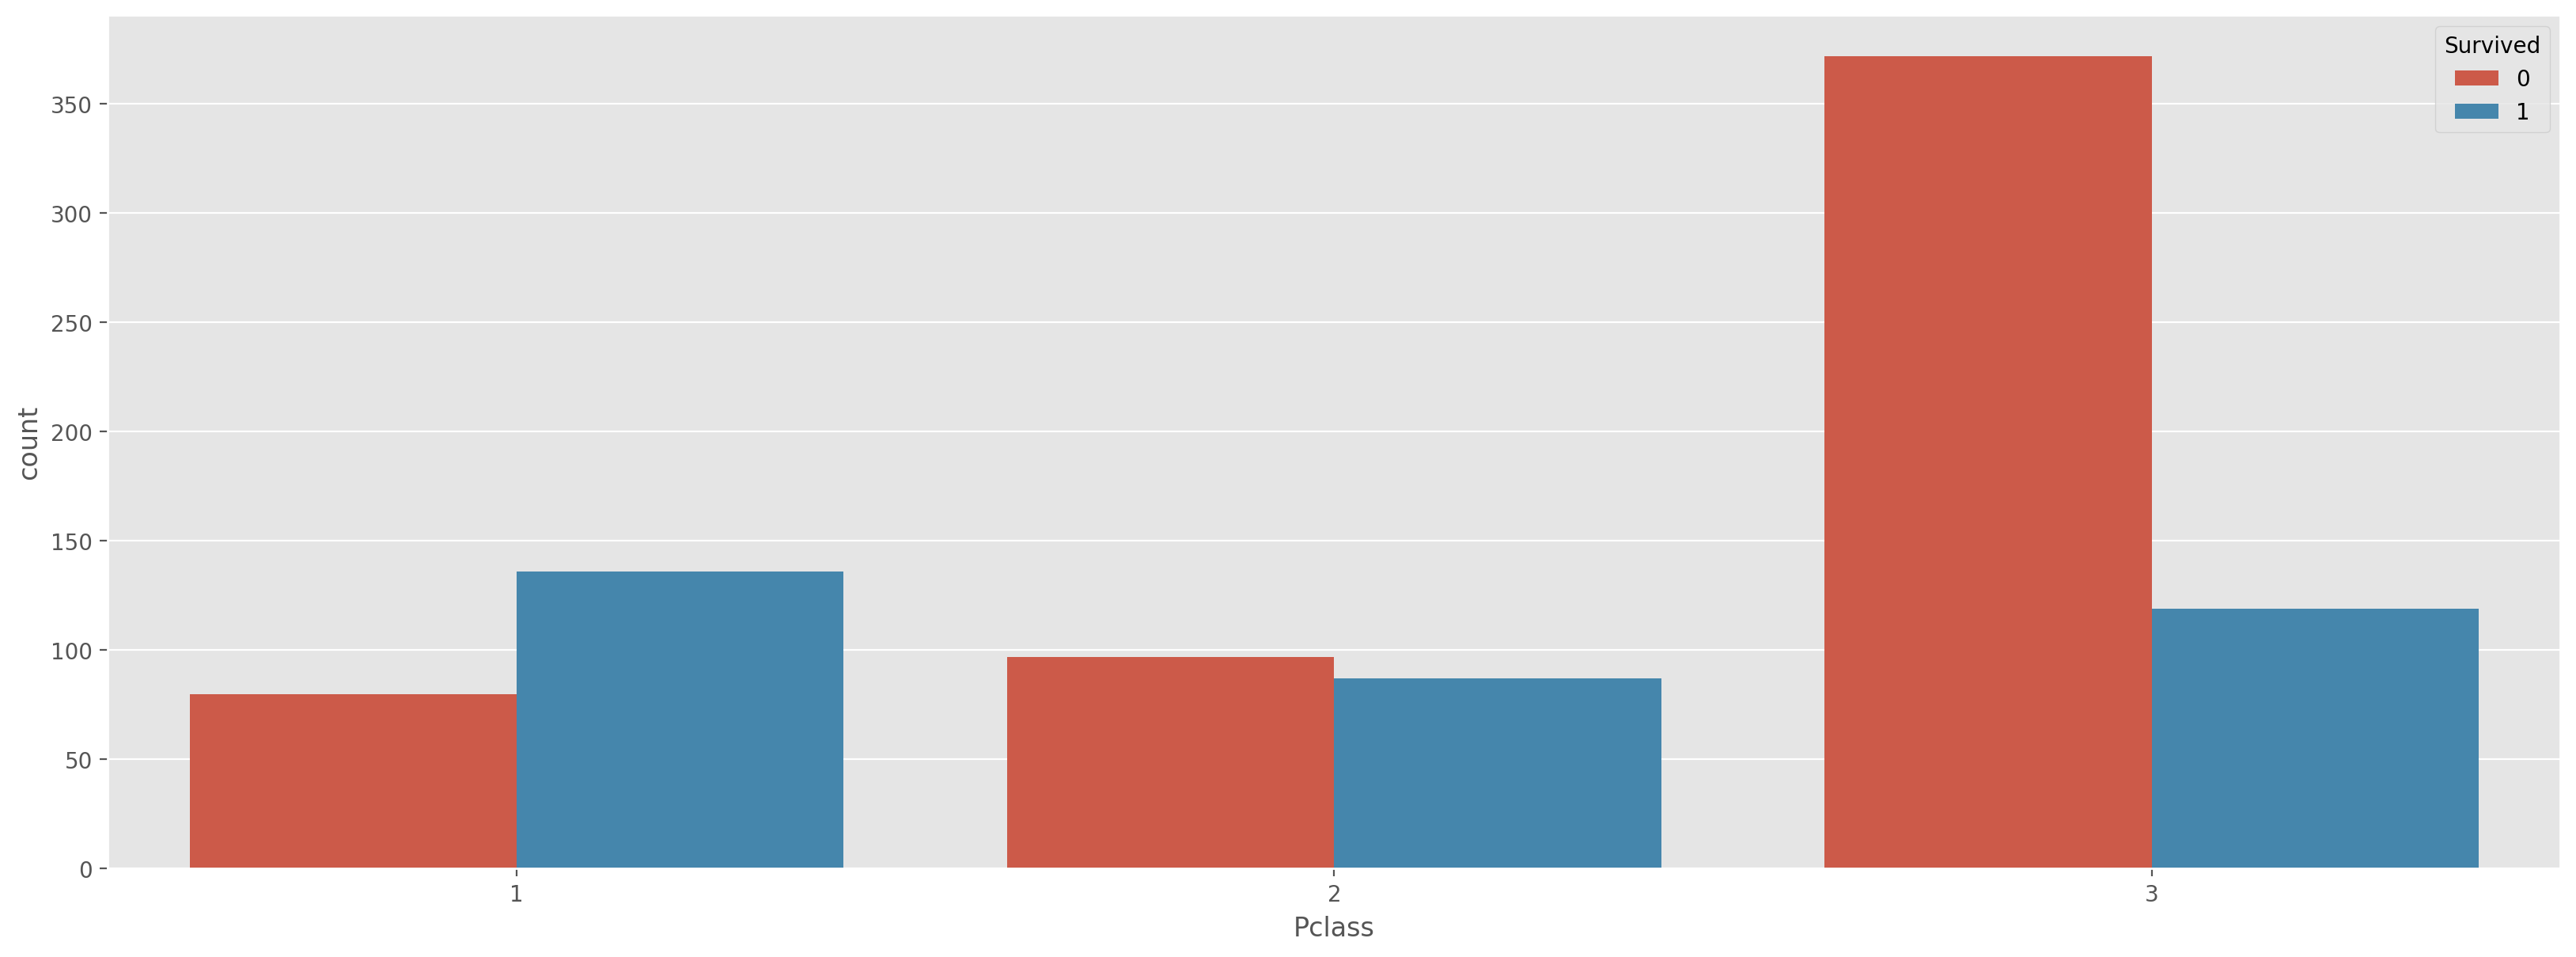

In [33]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = titanic.Pclass, hue = titanic.Survived)
plt.show()

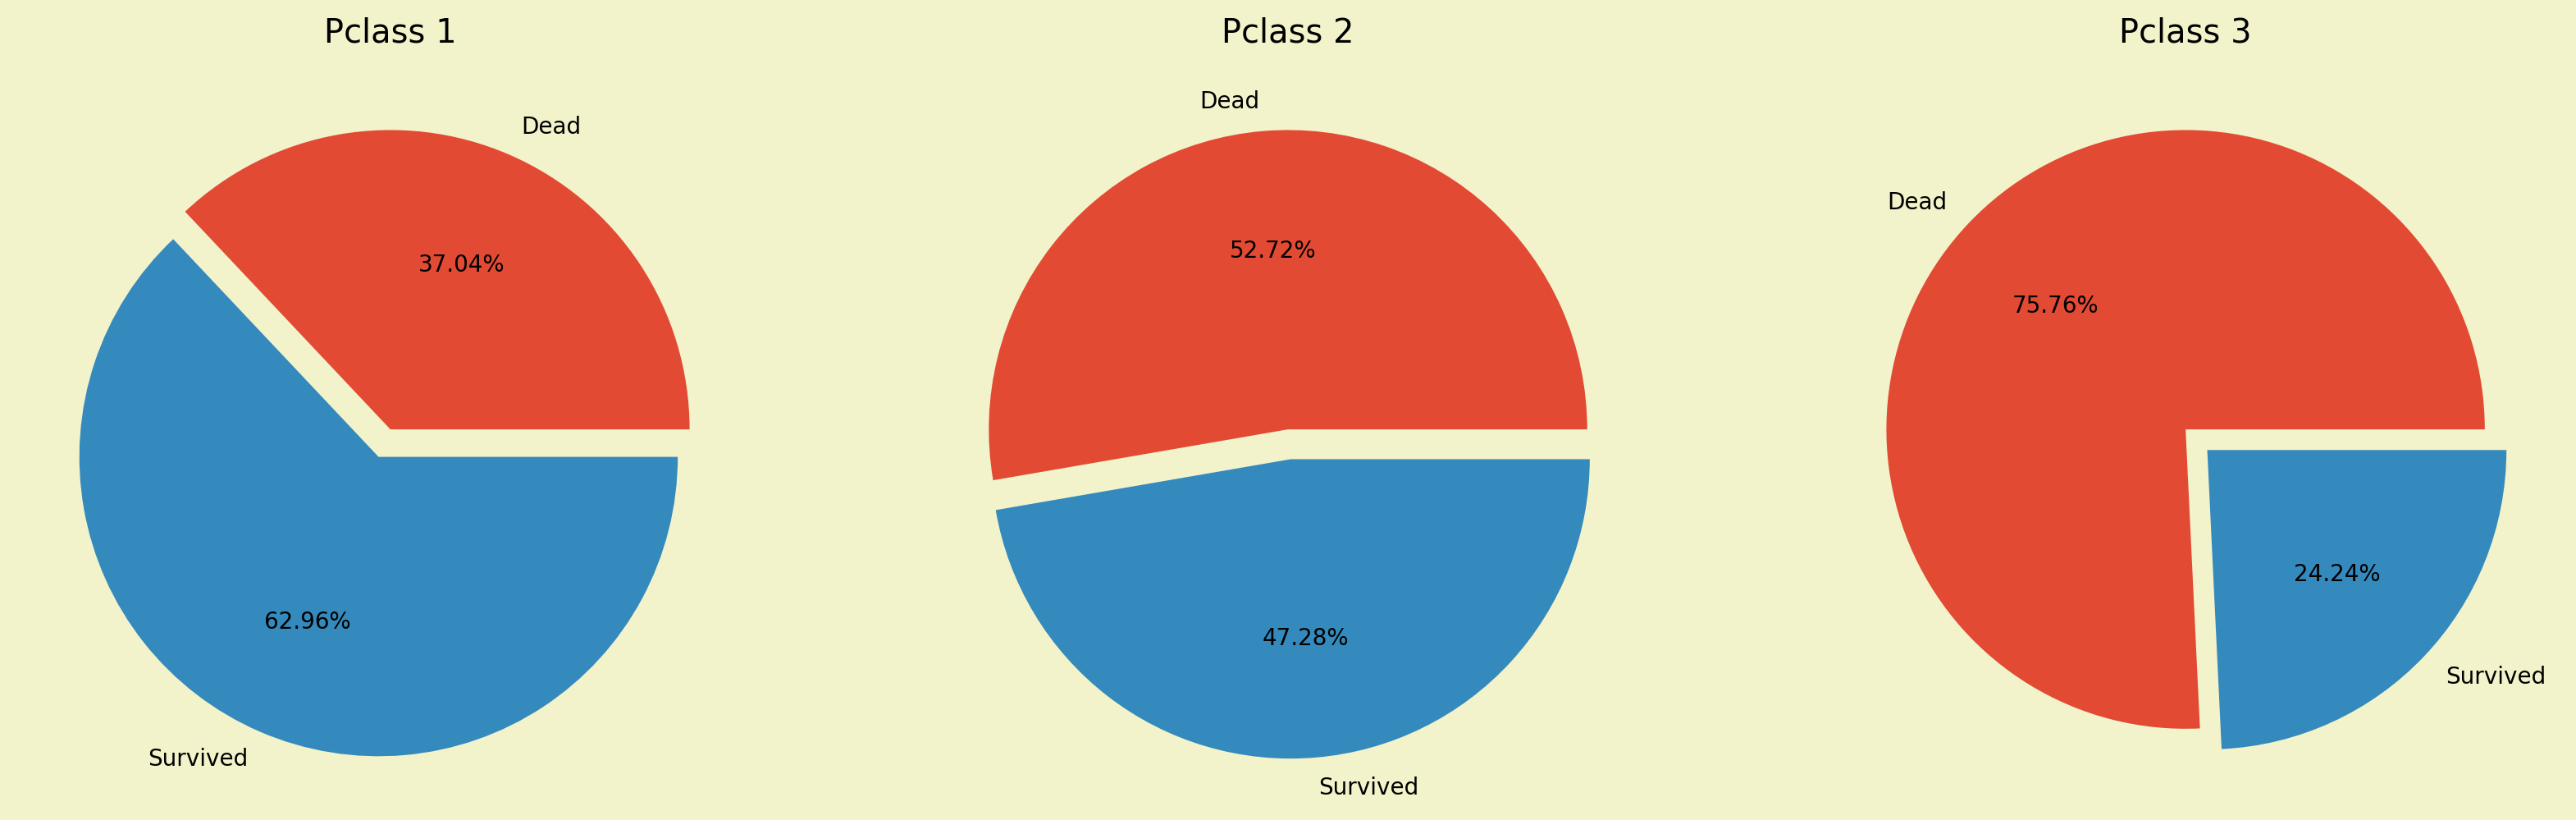

In [34]:
pclass_svl_rate = titanic.groupby('Pclass').Survived.value_counts(normalize = True).sort_index()
pclass1 = pclass_svl_rate[1]
pclass2 = pclass_svl_rate[2]
pclass3 = pclass_svl_rate[3]

labels = ['Dead', 'Survived']

plt.figure(figsize = (20,6), dpi = 200, facecolor = '#f2f2cb')
plt.subplot(1,3,1)
plt.pie(pclass1, labels = labels, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 1')
plt.subplot(1,3,2)
plt.pie(pclass2, labels = labels, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 2')
plt.subplot(1,3,3)
plt.pie(pclass3, labels = labels, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 3')

plt.show()

In [35]:
# Sex and Survived
titanic.groupby('Sex').Survived.value_counts(normalize = True).sort_index()

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

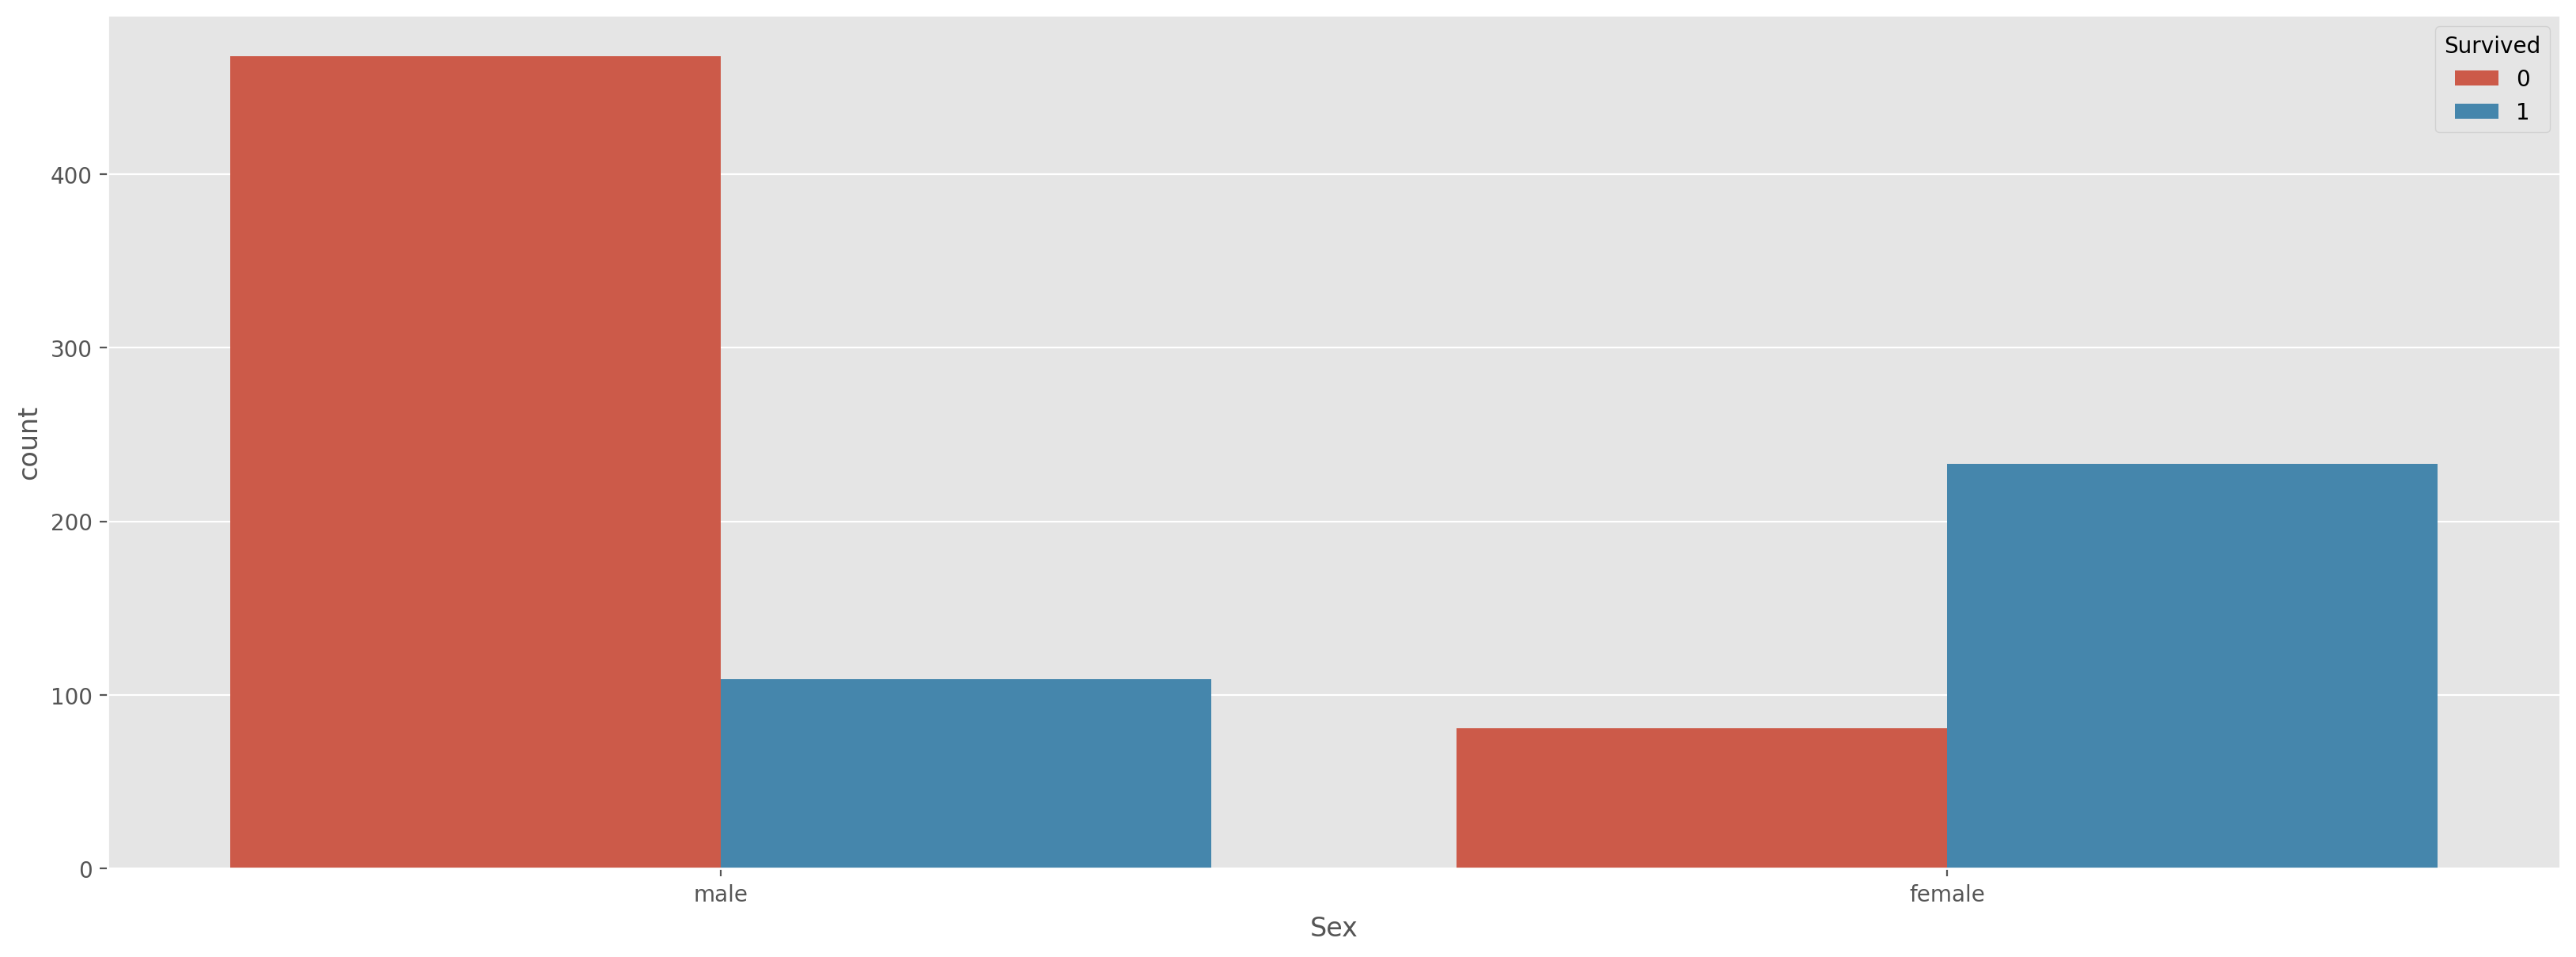

In [36]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = titanic.Sex, hue = titanic.Survived)
plt.show()

In [37]:
# Embarked and Survived
titanic.groupby('Embarked').Survived.value_counts(normalize = True).sort_index()

Embarked  Survived
C         0           0.446429
          1           0.553571
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: proportion, dtype: float64

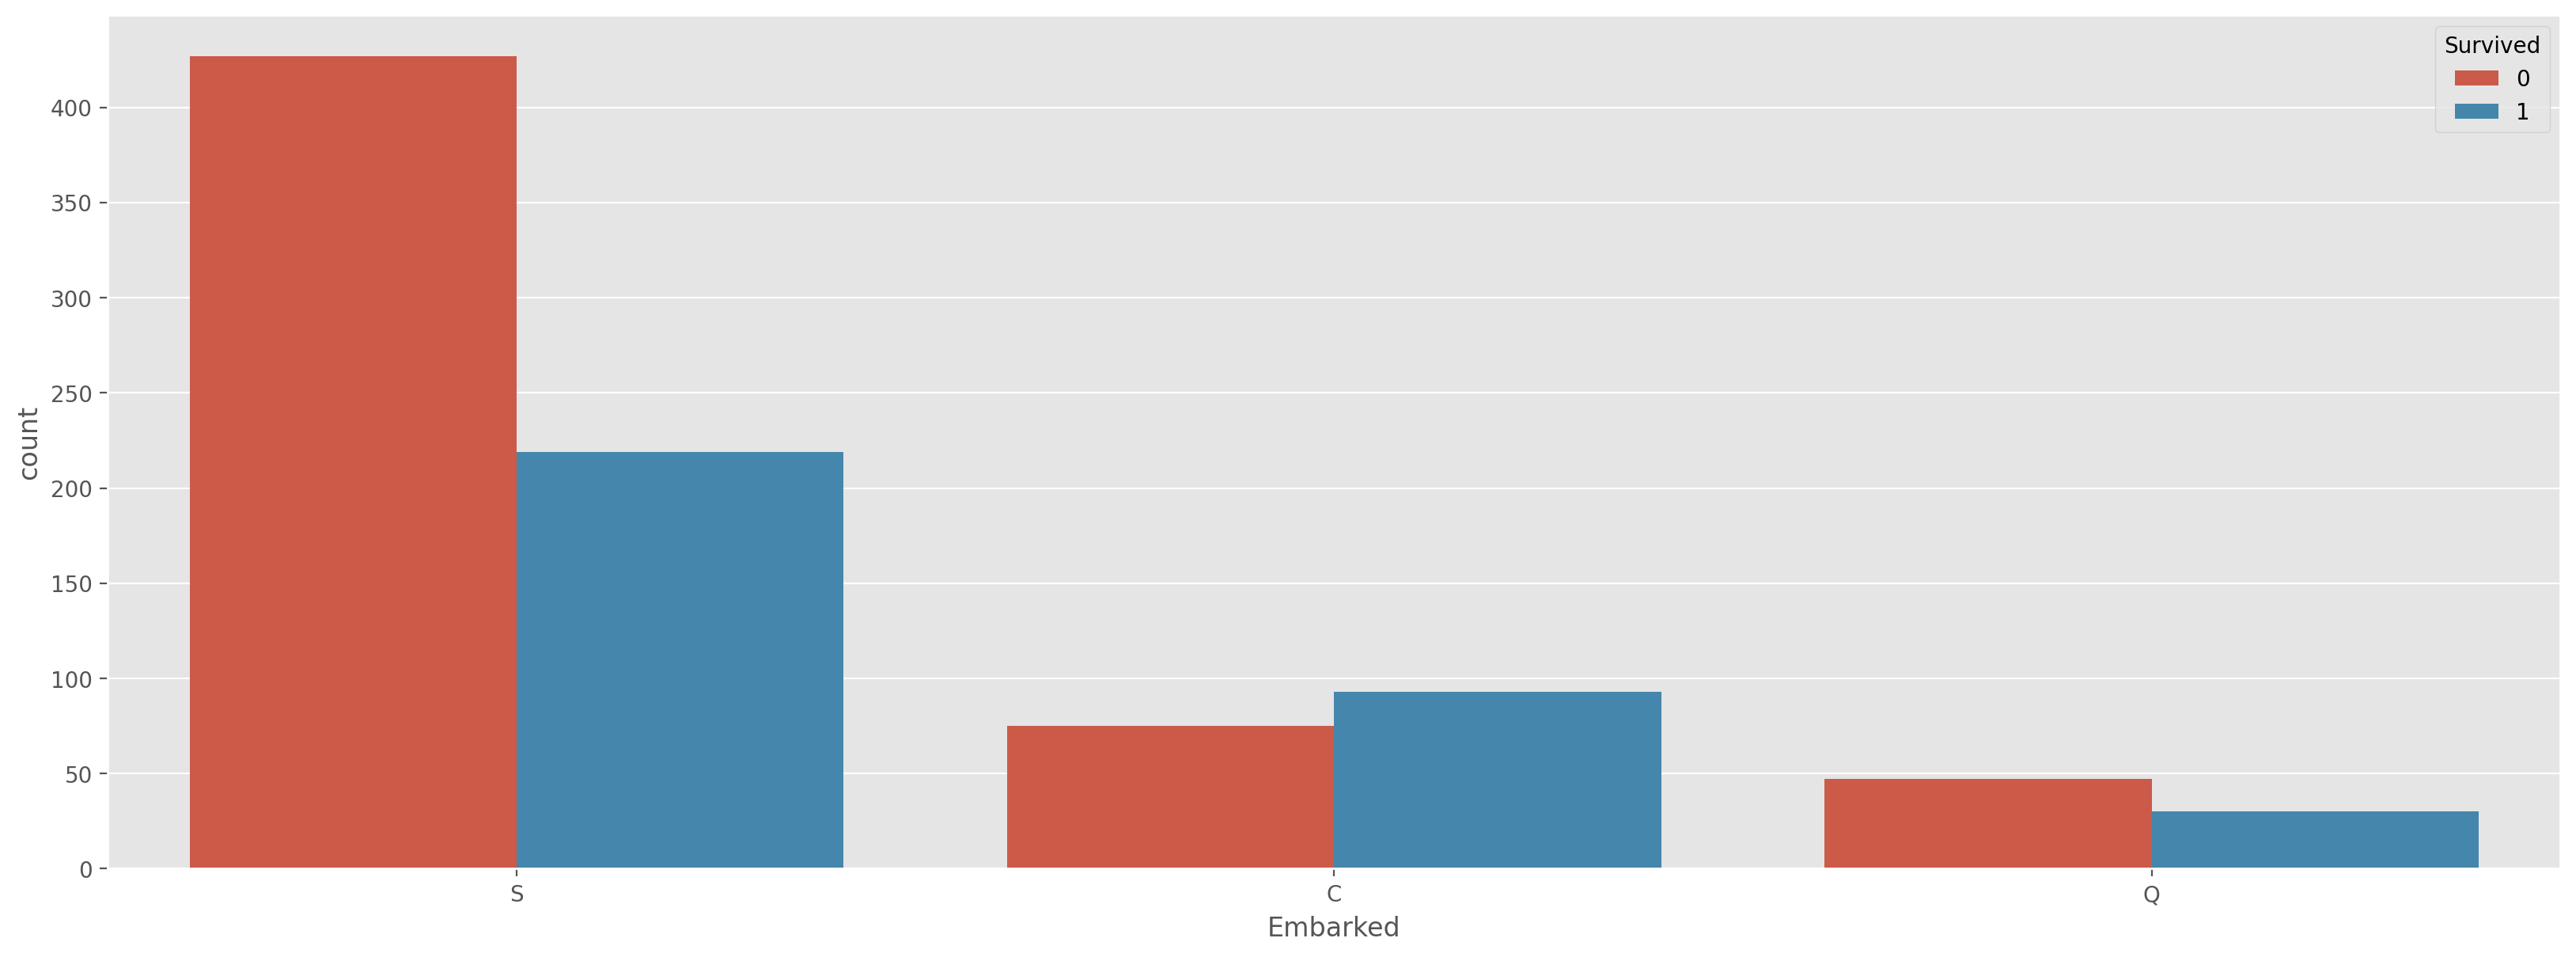

In [38]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = titanic.Embarked, hue = titanic.Survived)
plt.show()

In [39]:
# Pclass and Embarked
titanic.groupby('Embarked').Pclass.value_counts(normalize = True).sort_index()

Embarked  Pclass
C         1         0.505952
          2         0.101190
          3         0.392857
Q         1         0.025974
          2         0.038961
          3         0.935065
S         1         0.199690
          2         0.253870
          3         0.546440
Name: proportion, dtype: float64

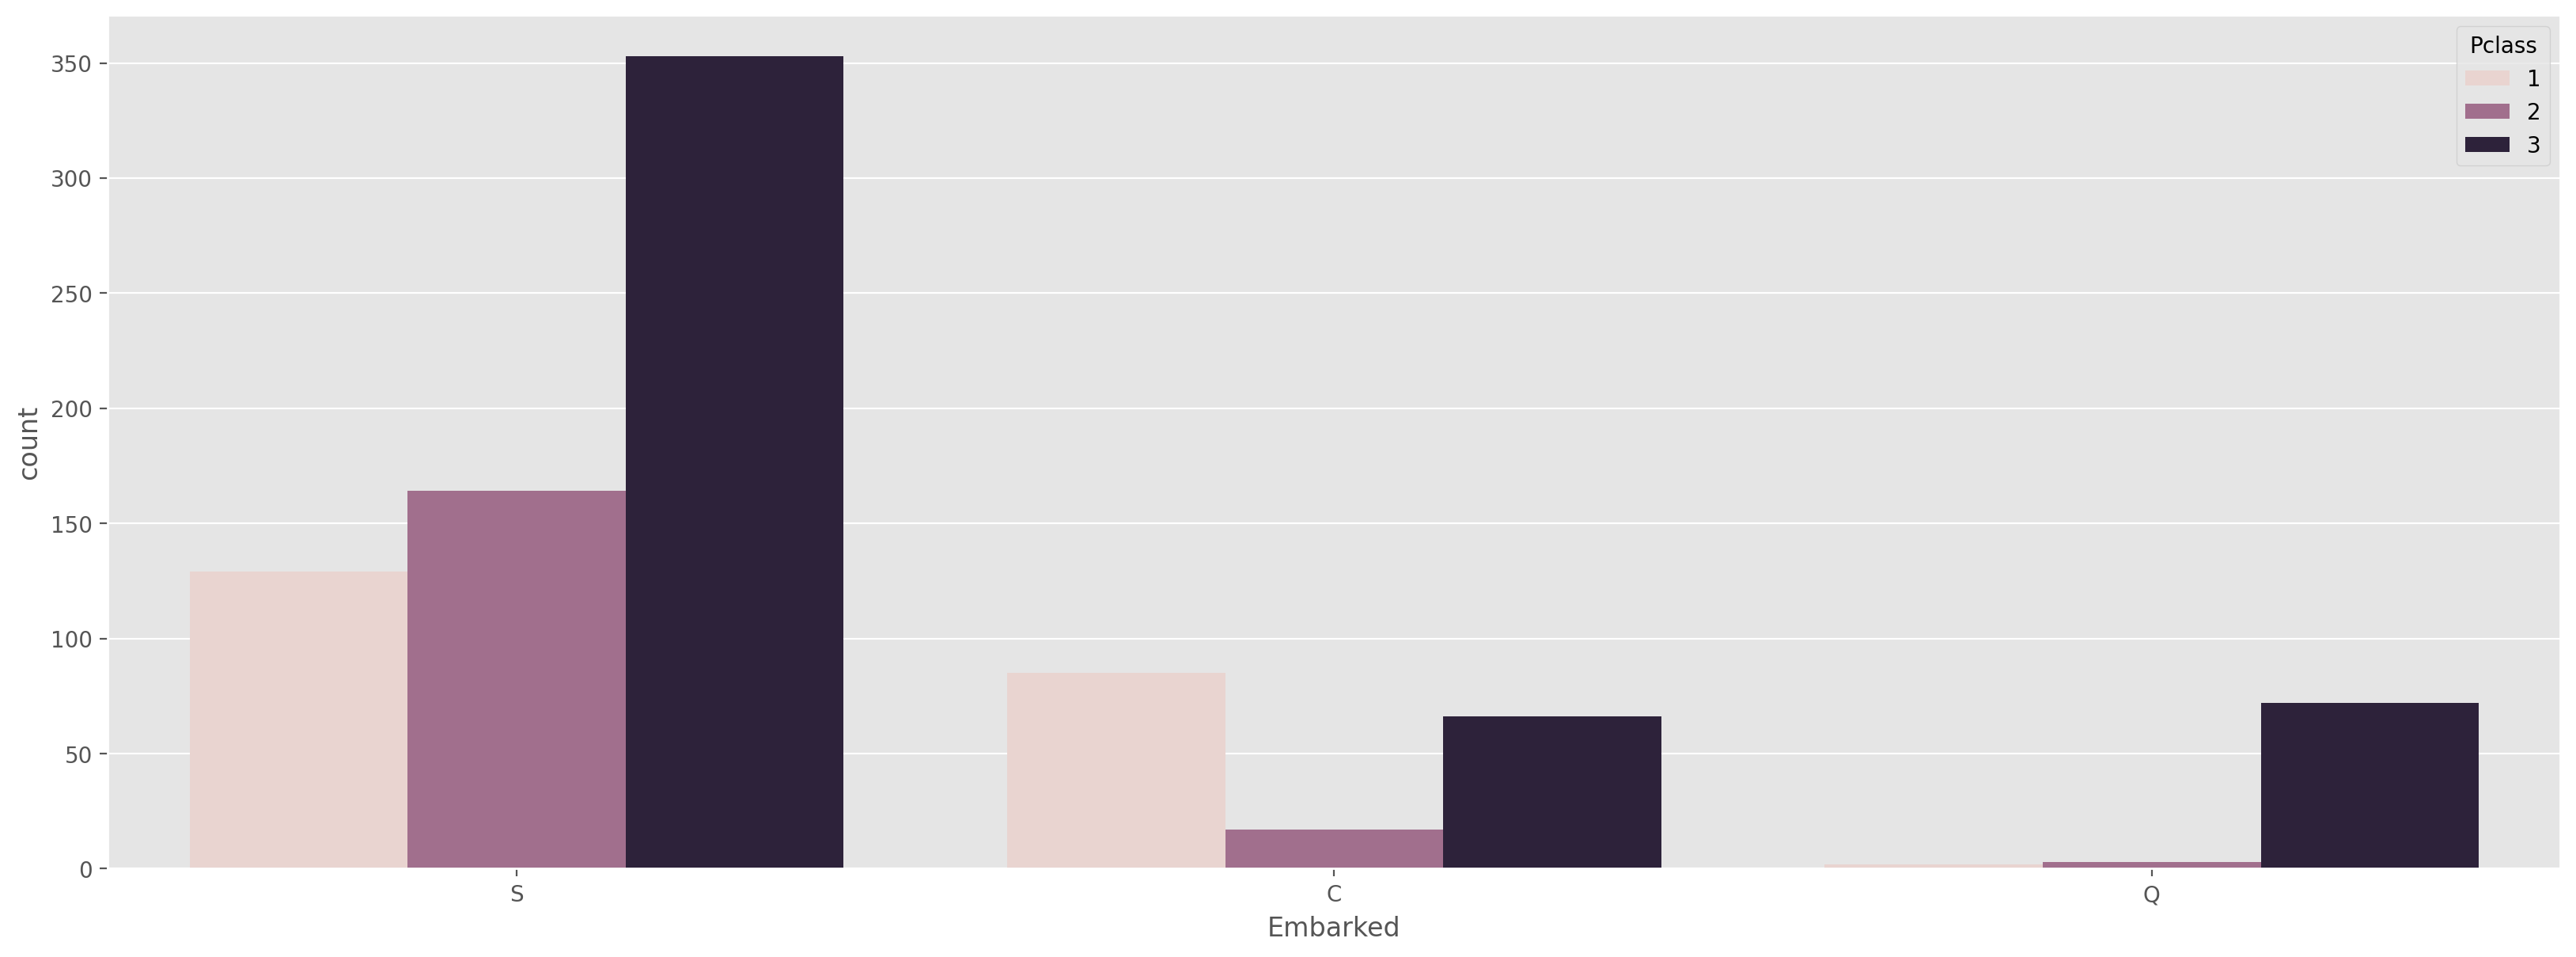

In [40]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = titanic.Embarked, hue = titanic.Pclass)
plt.show()

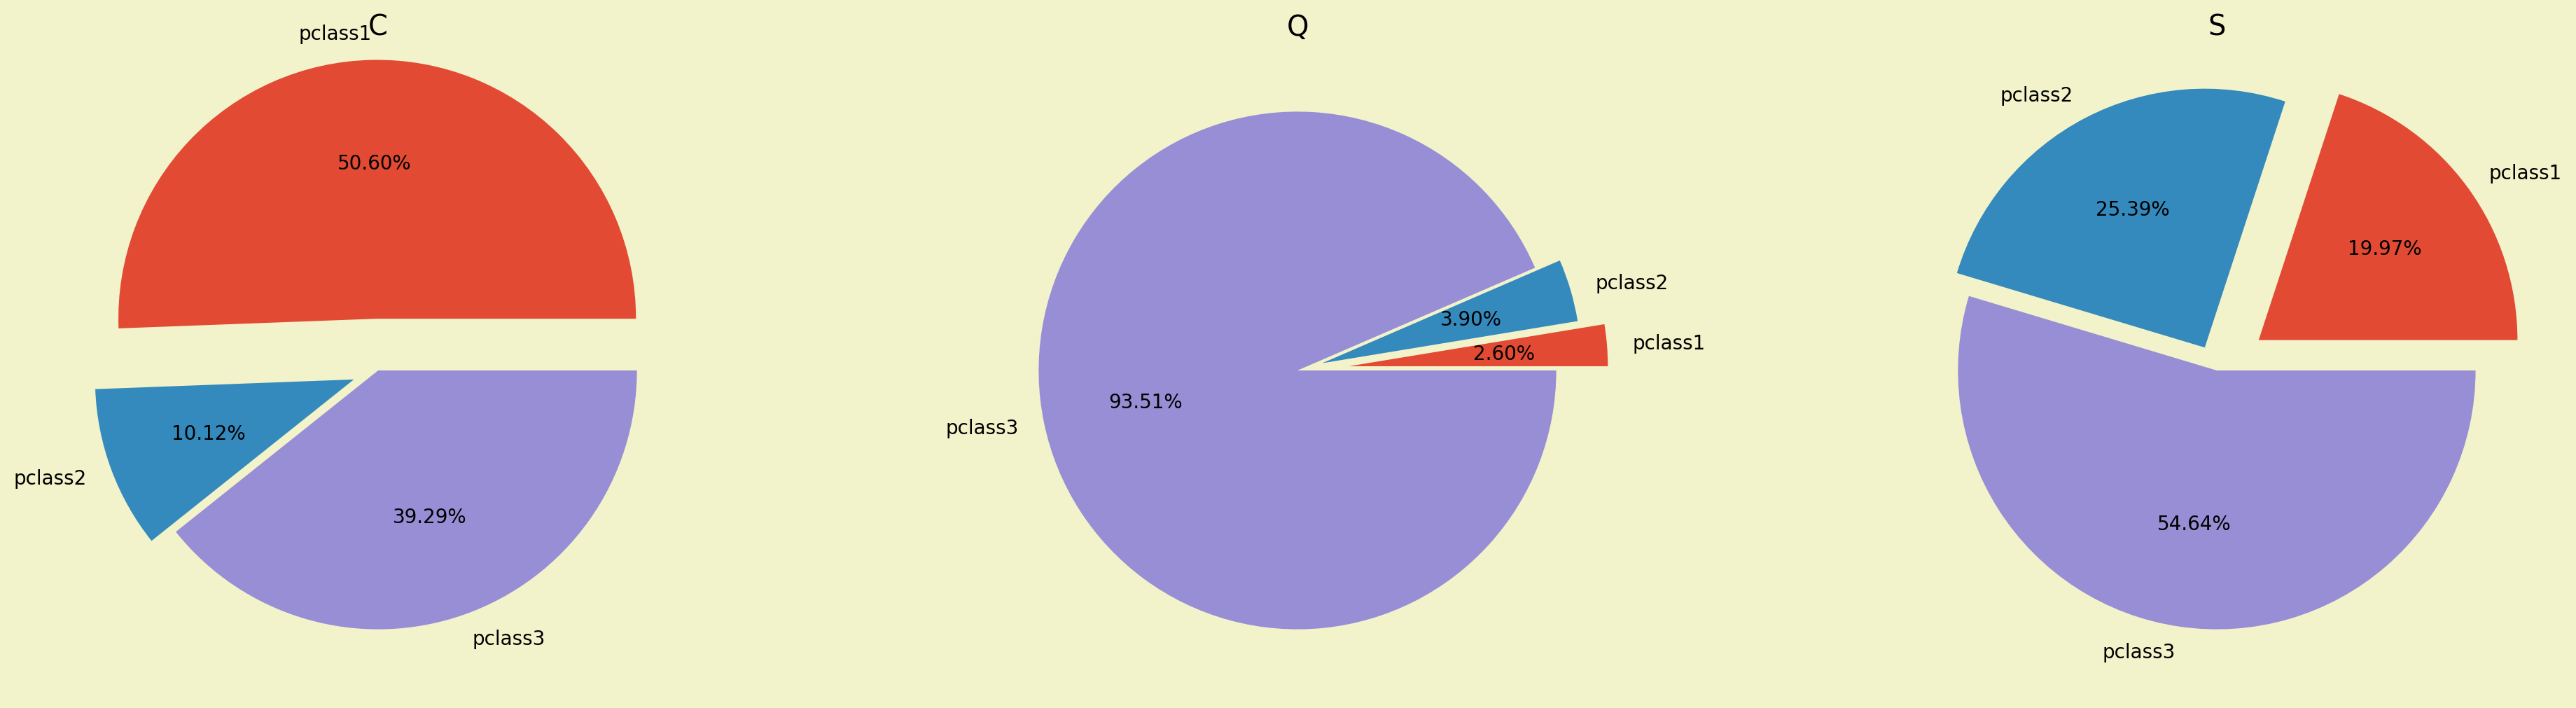

In [41]:
emb_pclass = titanic.groupby('Embarked').Pclass.value_counts().sort_index()
emb_c = emb_pclass['C']
emb_q = emb_pclass['Q']
emb_s = emb_pclass['S']

labels = ['pclass1', 'pclass2', 'pclass3']

plt.figure(figsize = (24,6), dpi = 200, facecolor = '#f2f2cb')
plt.subplot(1,3,1)
plt.pie(emb_c, labels = labels, autopct = '%1.2f%%', explode = [0.2,0.1,0])
plt.title('C')
plt.subplot(1,3,2)
plt.pie(emb_q, labels = labels, autopct = '%1.2f%%', explode = [0.2,0.1,0])
plt.title('Q')
plt.subplot(1,3,3)
plt.pie(emb_s, labels = labels, autopct = '%1.2f%%', explode = [0.2,0.1,0])
plt.title('S')

plt.show()

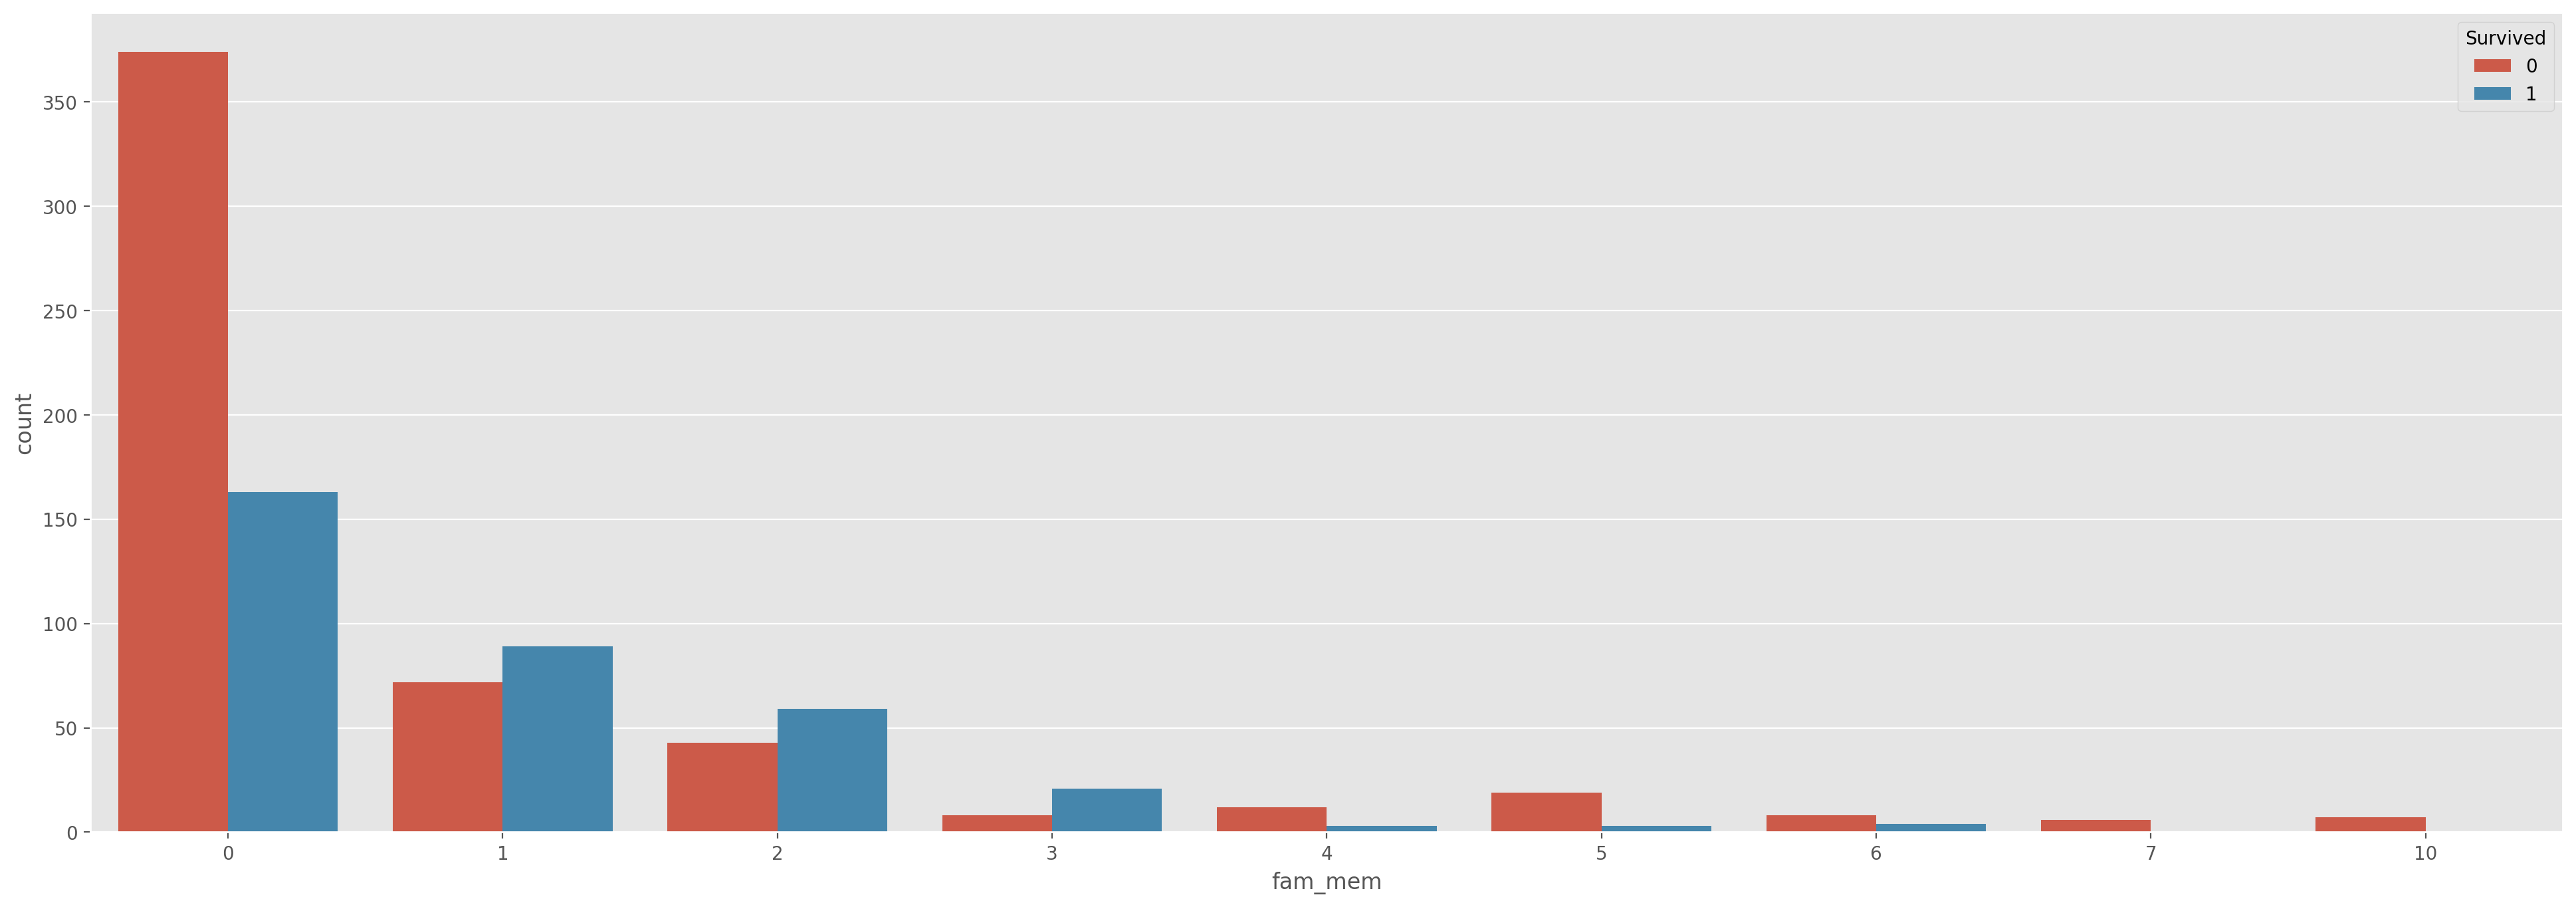

In [42]:
plt.figure(figsize = (24,8), dpi = 200)
sns.countplot(x = titanic.fam_mem, hue = titanic.Survived)
plt.show()

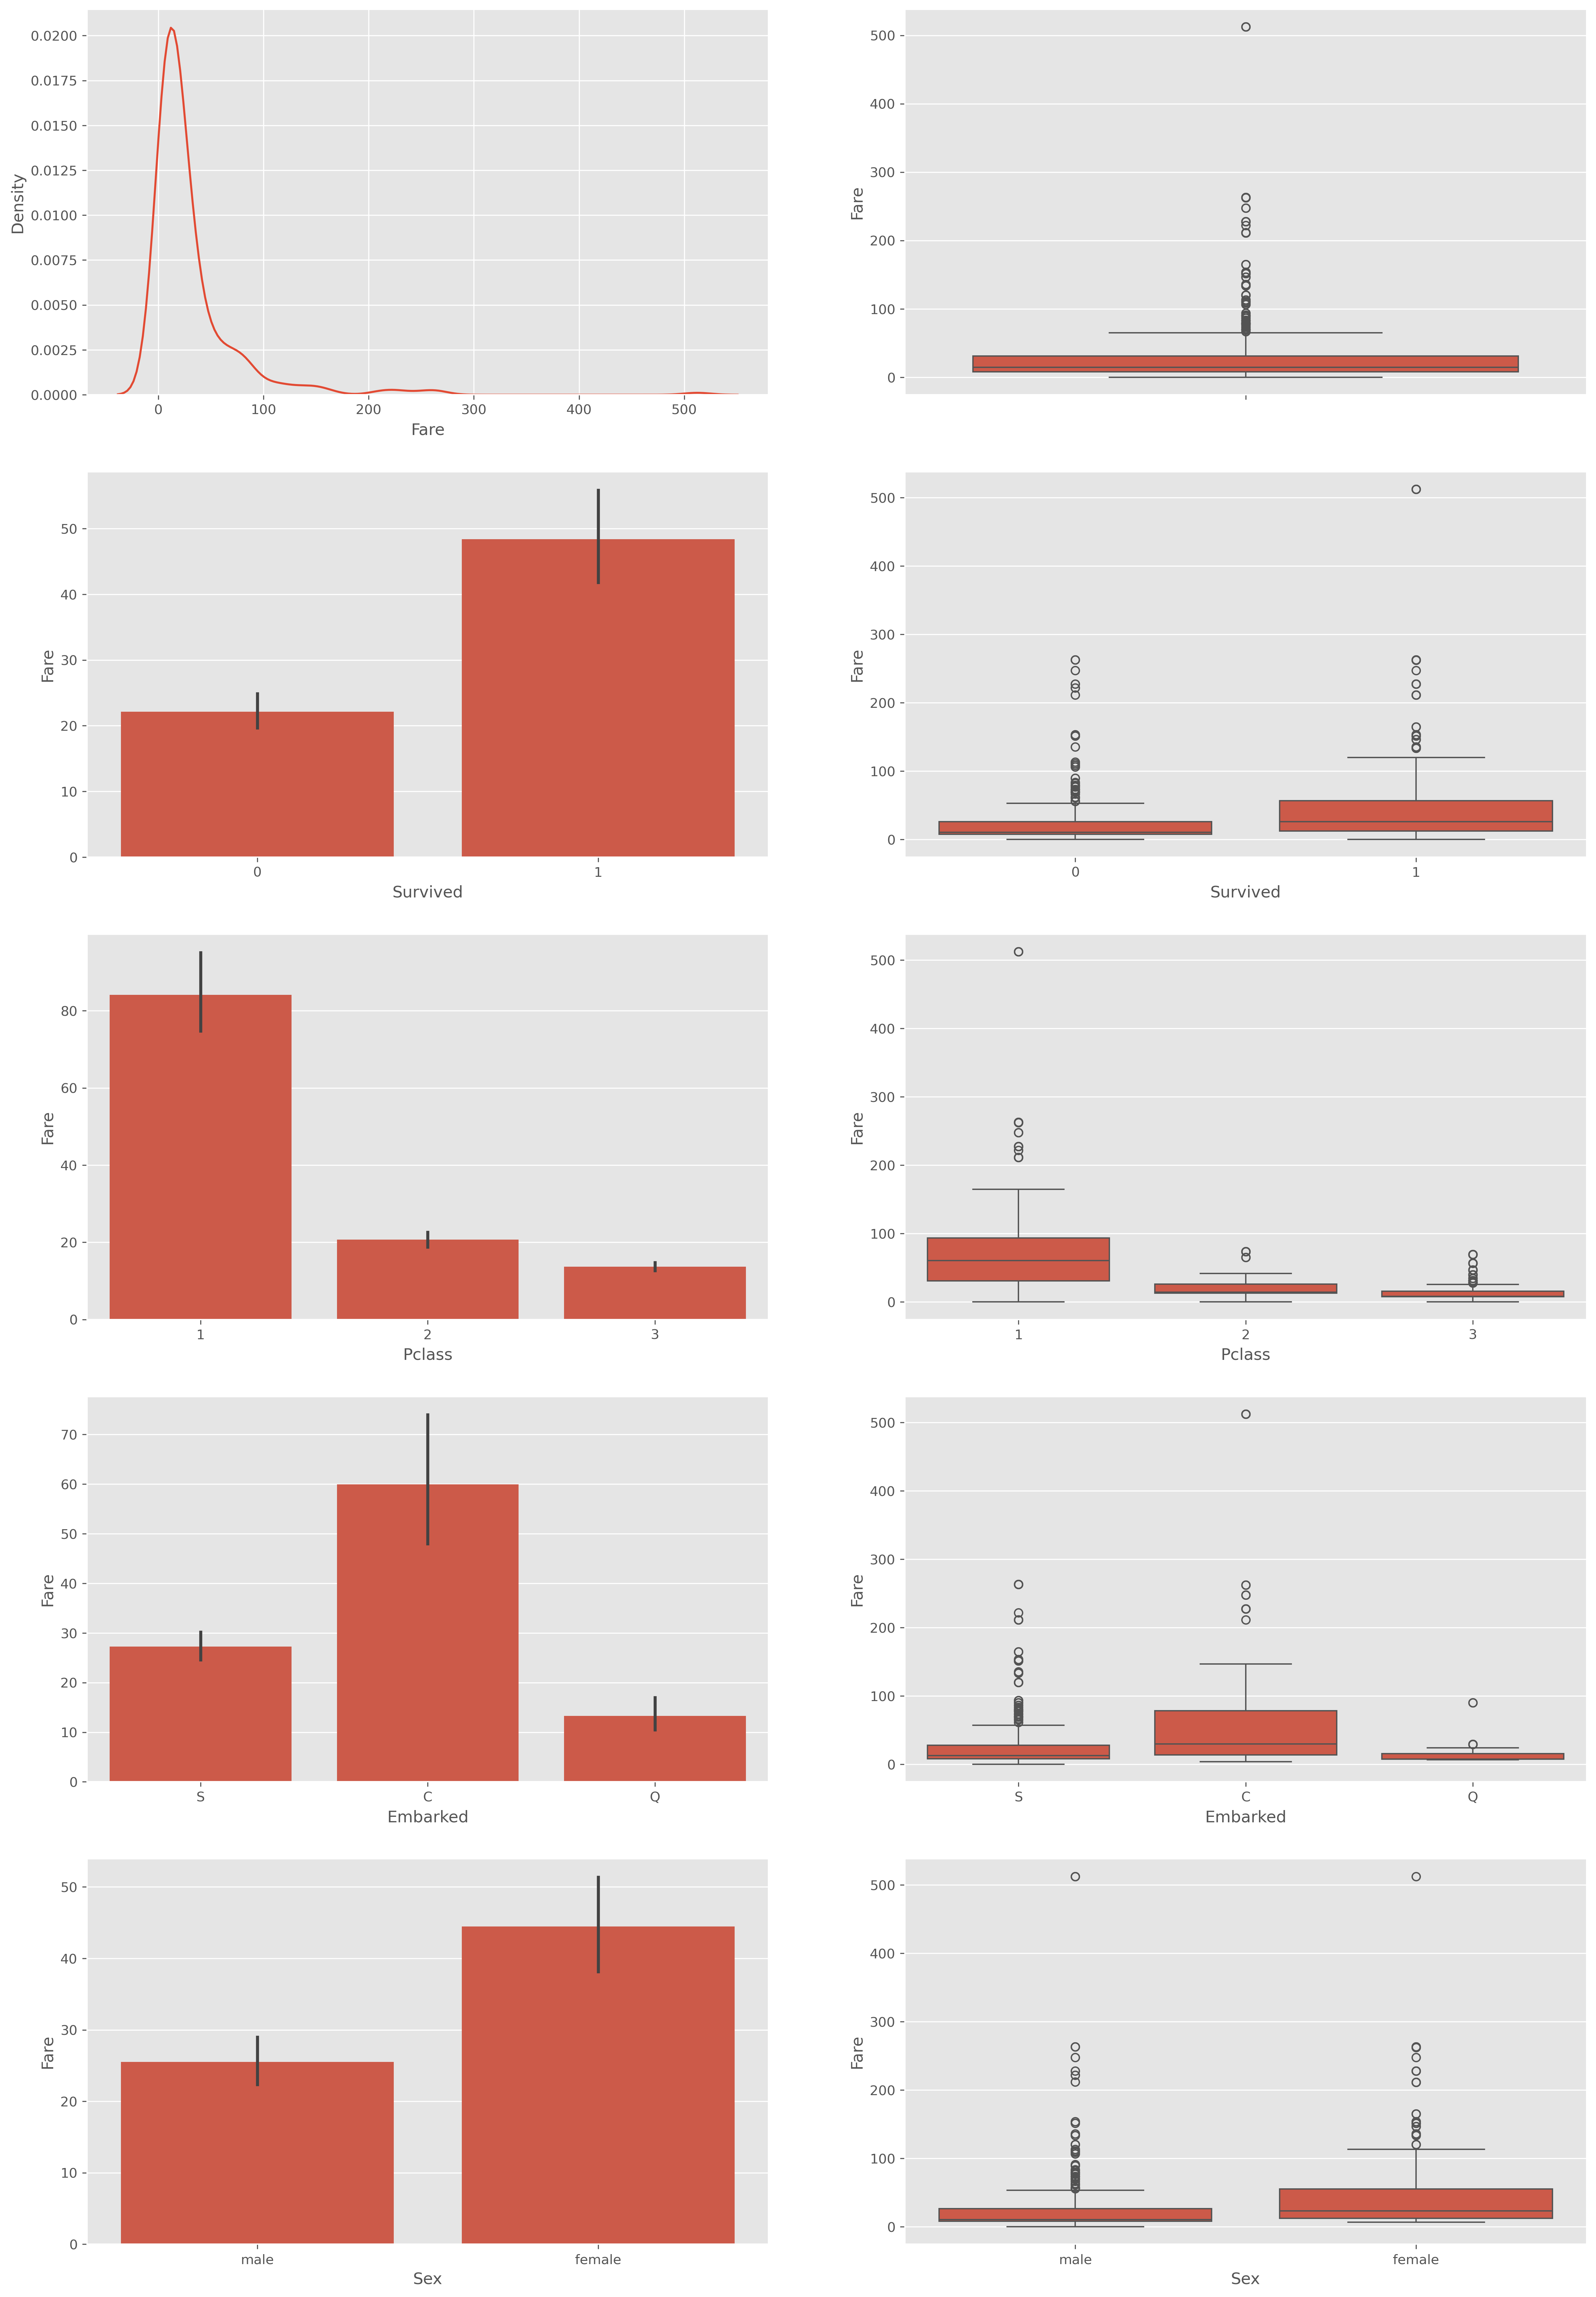

In [43]:
# Analysing fare column
plt.figure(figsize = (20,30), dpi = 300)
plt.subplot(5,2,1)
sns.distplot(titanic.Fare, hist = False)
plt.subplot(5,2,2)
sns.boxplot(titanic.Fare)

plt.subplot(5,2,3)
sns.barplot(x = titanic.Survived, y = titanic.Fare)
plt.subplot(5,2,4)
sns.boxplot(x = titanic.Survived, y = titanic.Fare)

plt.subplot(5,2,5)
sns.barplot(x = titanic.Pclass, y = titanic.Fare)
plt.subplot(5,2,6)
sns.boxplot(x = titanic.Pclass, y = titanic.Fare)

plt.subplot(5,2,7)
sns.barplot(x = titanic.Embarked, y = titanic.Fare)
plt.subplot(5,2,8)
sns.boxplot(x = titanic.Embarked, y = titanic.Fare)

plt.subplot(5,2,9)
sns.barplot(x = titanic.Sex, y = titanic.Fare)
plt.subplot(5,2,10)
sns.boxplot(x = titanic.Sex, y = titanic.Fare)
plt.show()

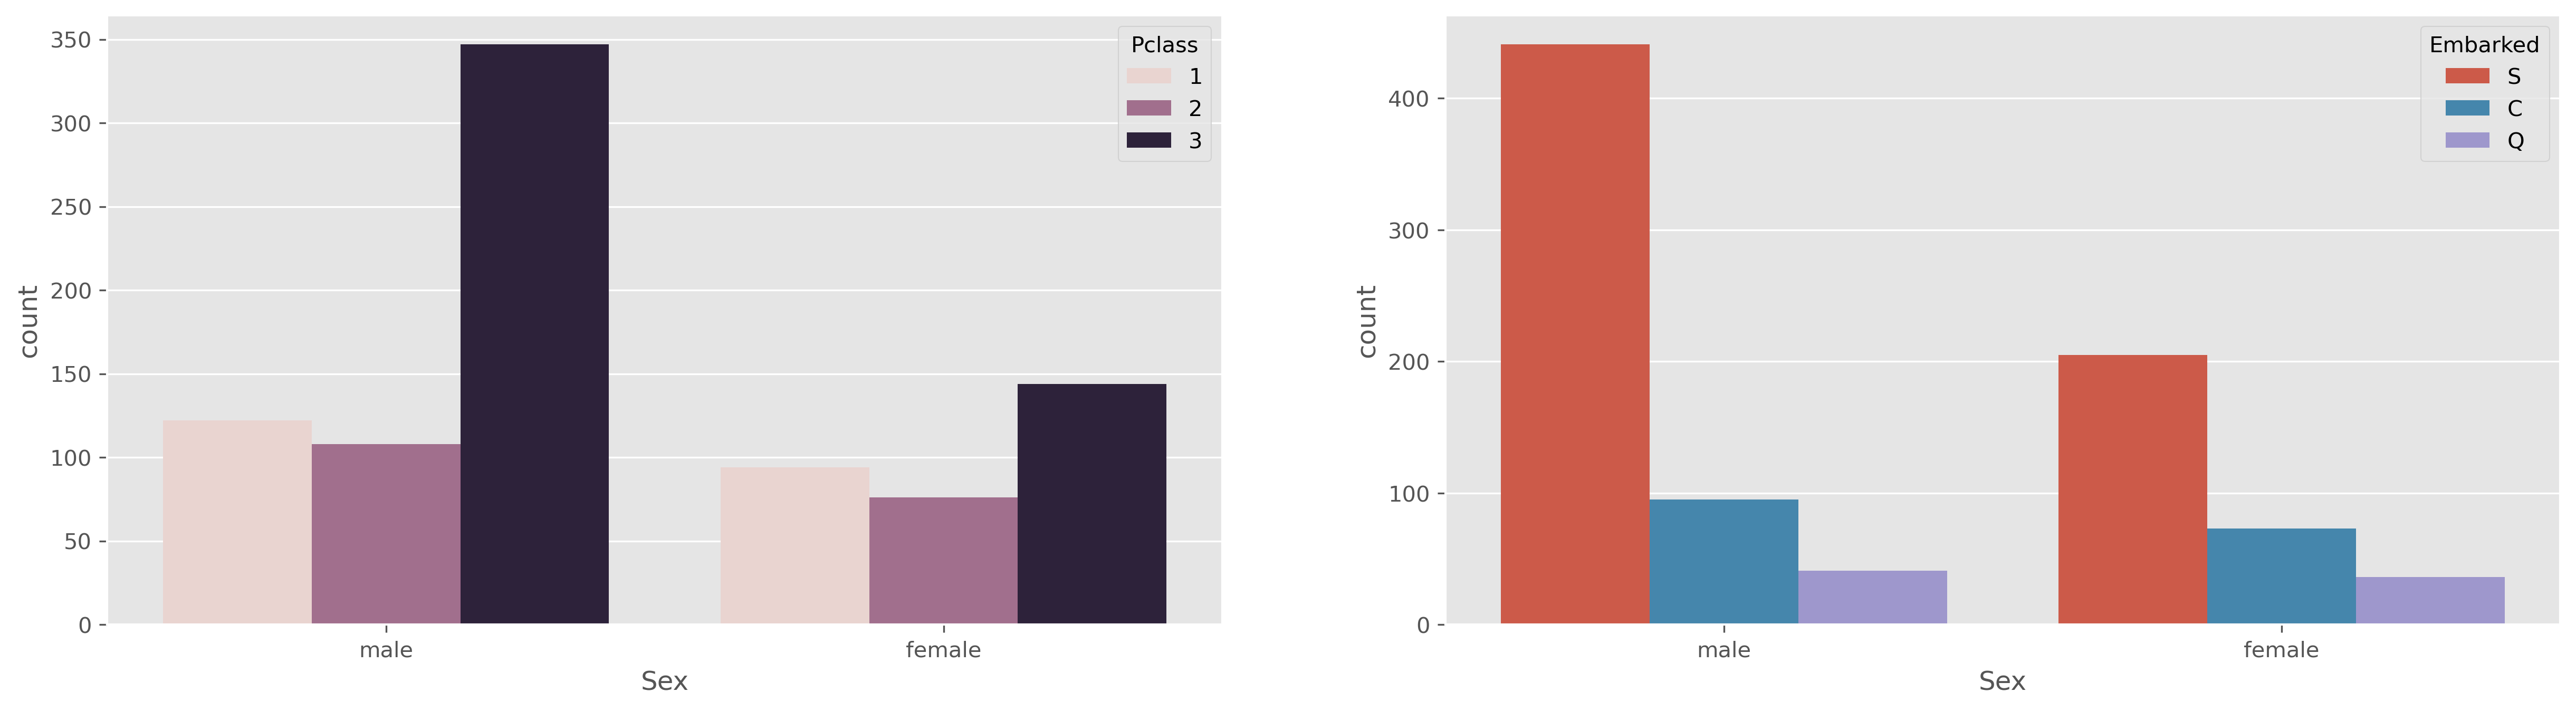

In [44]:
# Compare Sex with Pclass, Embarked
plt.figure(figsize = (20,5), dpi = 300)
plt.subplot(1,2,1)
sns.countplot(x = titanic.Sex, hue = titanic.Pclass)
plt.subplot(1,2,2)
sns.countplot(x = titanic.Sex, hue = titanic.Embarked)
plt.show()

In [45]:
titanic.groupby('Sex').Pclass.value_counts(normalize = True).sort_index()

Sex     Pclass
female  1         0.299363
        2         0.242038
        3         0.458599
male    1         0.211438
        2         0.187175
        3         0.601386
Name: proportion, dtype: float64

In [46]:
titanic.groupby('Sex').Embarked.value_counts(normalize = True).sort_index()

Sex     Embarked
female  C           0.232484
        Q           0.114650
        S           0.652866
male    C           0.164645
        Q           0.071057
        S           0.764298
Name: proportion, dtype: float64